In [1]:
import pandas as pd
import numpy as np
import json

# results = pd.read_csv('likert-data/likert-q0-factor.csv')
# results.head()
# print(results)
results = dict()
for i in range(10):
    key = 'q' + str(i)
    results[key] = pd.read_csv('hypotheses/likert-' + key + '-factor.csv')
    results[key] = results[key].drop(labels="participants", axis=1)
    results[key] = json.loads(results[key].to_json())
print(results['q0'])
interaction_q = ['q7', 'q5', 'q4', 'q3', 'q6']
other_q = ['q8', 'q1', 'q9', 'q0', 'q2']
questions = {
    "q0": "This style of \nvisualization was easy to \nread and understand.", 
    "q1": "The visualization \nstyle supported answering \nthe questions asked.", 
    "q2": "The provided \ninteractions overall \nsupported answering \nthe questions asked.",  
    "q3": "click-and\n-drag", 
    "q4": "scroll ", 
    "q5": "double \nclick", 
    "q6": "hover", 
    "q7": "reset",
    "q8": "It was enjoyable \nutilizing the interactions.", 
    "q9": "The visualizations were \naesthetically pleasing."
}

{'values': {'0': 5, '1': 2, '2': 4, '3': 4, '4': 4, '5': 3, '6': 4, '7': 4, '8': 2, '9': 4, '10': 4, '11': 4, '12': 4, '13': 3, '14': 3, '15': 4, '16': 2, '17': 2, '18': 4, '19': 3, '20': 4, '21': 4, '22': 3, '23': 5, '24': 5, '25': 1, '26': 4, '27': 4, '28': 3, '29': 4, '30': 2, '31': 1, '32': 4, '33': 4, '34': 5, '35': 4, '36': 5, '37': 4, '38': 4, '39': 4, '40': 3, '41': 2, '42': 4, '43': 4, '44': 4, '45': 3, '46': 4, '47': 4, '48': 4, '49': 3, '50': 4, '51': 4, '52': 5, '53': 5, '54': 4, '55': 3, '56': 4, '57': 5, '58': 2, '59': 4, '60': 5, '61': 1, '62': 2, '63': 4, '64': 4, '65': 4, '66': 4, '67': 4, '68': 3, '69': 4, '70': 2, '71': 1, '72': 5, '73': 2, '74': 5, '75': 5, '76': 4, '77': 4, '78': 3, '79': 4, '80': 3, '81': 4, '82': 4, '83': 4, '84': 2, '85': 2, '86': 2}, 'groups': {'0': 'E', '1': 'H', '2': 'S', '3': 'E', '4': 'H', '5': 'S', '6': 'E', '7': 'H', '8': 'S', '9': 'E', '10': 'H', '11': 'S', '12': 'E', '13': 'H', '14': 'S', '15': 'E', '16': 'H', '17': 'S', '18': 'E', '19'

In [2]:
import json 
with open("results.json",'w') as fdata:
    json.dump(results,fdata,indent=4)

AttributeError: 'dict' object has no attribute 'unique'

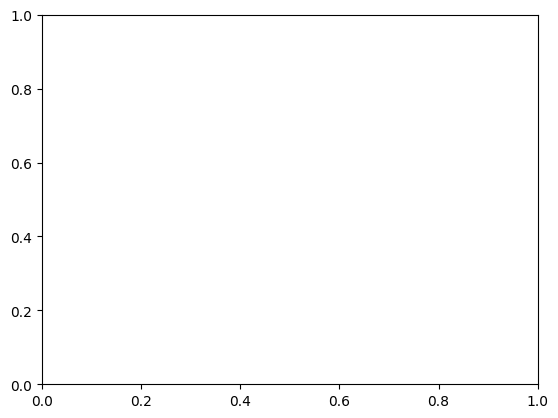

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

for key, df in results.items():
    fig, ax = plt.subplots(sharey=True)
    for group in df['groups'].unique():
        if (group == 'E'):
            offset = 0.05
        elif (group == 'H'):
            offset = -0.05
        else:
            offset = 0  
        df_group = df[df['groups'] == group]
        ax.plot(df_group['participants'], df_group['values'] + offset, label='Group ' + group, alpha=0.6, marker='o')
        fig.set_figwidth(15)
    plt.setp(ax, ylim=(0, 6), yticklabels=["", "Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree", ""], xticks=[], xticklabels=[])
    plt.xlabel('Participants')
    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.set_title(questions[key])
    ax.legend()
    fig.savefig('figs/full_figure' + key[1] + '.png')
    plt.show()

AttributeError: 'dict' object has no attribute 'unique'

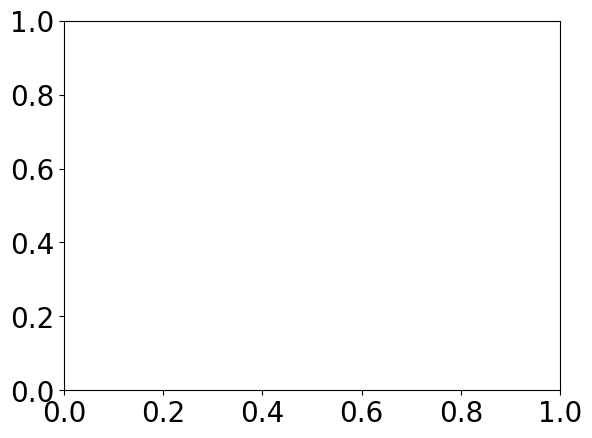

In [5]:
fig, ax = plt.subplots()
for group in results[list(results.keys())[0]]['groups'].unique():
    # Initialize a list to store mean values for each question
    mean_values = []
    # Iterate over the questions
    for key, df in results.items():
        # Filter the dataframe for the current group
        df_group = df[df['groups'] == group]
        # # Calculate the mean value and append it to the list
        mean_values.append(df_group['values'].mean())
    # Plot the mean values for the current group
    ax.plot(mean_values, list(results.keys()), label='Group ' + group, alpha=0.6, marker='o')

# Set the figure width
fig.set_figwidth(8)
fig.set_figheight(10)

# Set the x-axis limits and ensure it only uses integer values
plt.setp(ax, xlim=(0, 6))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.set_xticklabels(["", "Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree", ""])
ax.set_yticklabels(questions.values(), wrap=True, fontsize=8)

# Set the title, legend, and save the figure
ax.set_title("Mean Values for Each Question")
ax.legend()
# fig.savefig('figs/full_figure.png')
plt.show()

AttributeError: 'dict' object has no attribute 'unique'

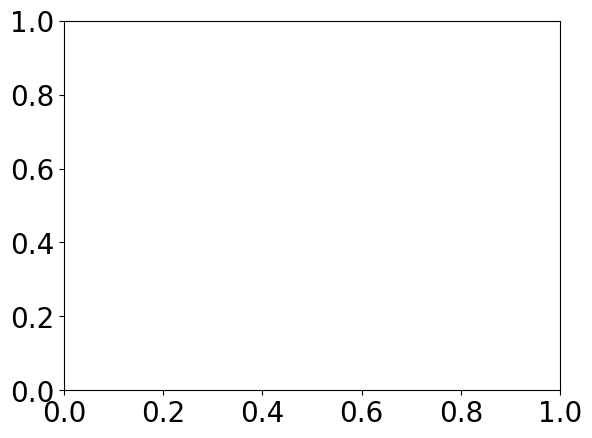

In [6]:
# Create a new figure
fig, ax = plt.subplots()

# Iterate over the groups
for group in results[interaction_q[0]]['groups'].unique():
    # Initialize a list to store mean values for each question
    mean_values = []
    # Iterate over the questions
    for new_key in interaction_q:
        for key, df in results.items():
            if (key == new_key):
            # Filter the dataframe for the current group
                df_group = df[df['groups'] == group]
                # Calculate the mean value and append it to the list
                mean_values.append(df_group['values'].mean())
        # Filter the dataframe for the current group
        # df_group = df[df['groups'] == group]
        # # Calculate the mean value and append it to the list
        # mean_values.append(df_group['values'].mean())
    # Plot the mean values for the current group

    ax.plot(mean_values, interaction_q, label=group, alpha=0.6, marker='o')

fig.set_size_inches(7,4)

# Set the x-axis limits and ensure it only uses integer values
plt.setp(ax, xlim=(0, 6))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.set_xticklabels(["", "Strongly \nDisagree", "Disagree", "Neutral", "Agree", "Strongly \nAgree", ""])
values = []
for each in interaction_q:
    values.append(questions[each])
ax.set_yticklabels(values, wrap=True, fontsize=10)

# Set the title, legend, and save the figure
ax.set_title("Interaction-Related Feedback")
ax.legend()

fig.subplots_adjust(left=0.3)

fig.savefig('figures/interaction-likert.pdf')
plt.show()

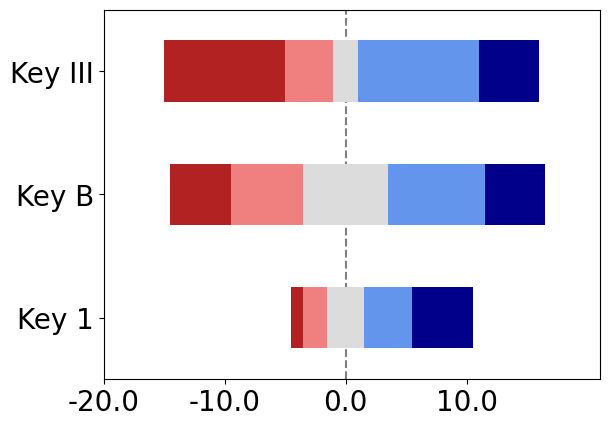

In [7]:
likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']
dummy = pd.DataFrame([[1,2,3,4, 5], [5,6,7,8, 5], [10, 4, 2, 10, 5]],
                     columns=["SD", "D", "N", "A", "SA"],
                    index=["Key 1", "Key B", "Key III"])
middles = dummy[["SD", "D"]].sum(axis=1)+dummy["N"]*.5
longest = middles.max() + 5
complete_longest = dummy.sum(axis=1).max()
dummy.insert(0, '', (middles - longest).abs())

dummy.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=False)
z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)

plt.xlim(0, complete_longest + 10)
xvalues = range(0,complete_longest,10)
xlabels = [str(x-longest) for x in xvalues]
plt.xticks(xvalues, xlabels)
plt.show()

AttributeError: 'dict' object has no attribute 'unique'

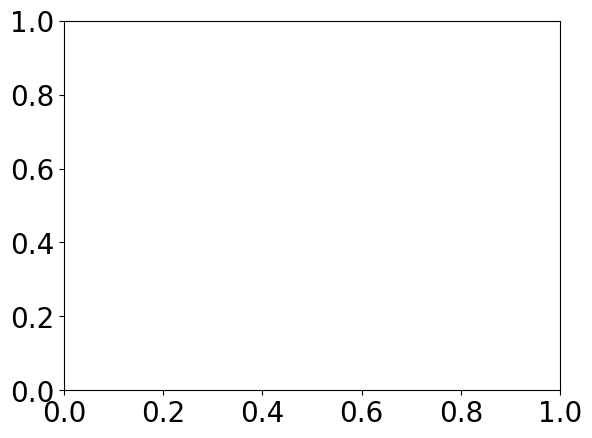

In [8]:
fig, ax = plt.subplots()
for group in results[other_q[0]]['groups'].unique():
    # Initialize a list to store mean values for each question
    mean_values = []
    # Iterate over the questions
    for new_key in other_q:
        for key, df in results.items():
            if (key == new_key):
                # Filter the dataframe for the current group
                df_group = df[df['groups'] == group]
                # Calculate the mean value and append it to the list
                mean_values.append(df_group['values'].mean())
        # Filter the dataframe for the current group
        # df_group = df[df['groups'] == group]
        # # Calculate the mean value and append it to the list
        # mean_values.append(df_group['values'].mean())
    # Plot the mean values for the current group
    ax.plot(mean_values, other_q, label=group, alpha=0.6, marker='o')

# Set the figure width
fig.set_size_inches(7,4)

# Set the x-axis limits and ensure it only uses integer values
plt.setp(ax, xlim=(0, 6))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.set_xticklabels(["", "Strongly \nDisagree", "Disagree", "Neutral", "Agree", "Strongly \nAgree", ""])
values = []
for each in other_q:
    values.append(questions[each])
ax.set_yticklabels(values, wrap=True, fontsize=10)

# Set the title, legend, and save the figure
ax.set_title("Aesthetic-Related Feedback")
ax.legend()

fig.subplots_adjust(left=0.3)

fig.savefig('figures/aesthetic-likert.pdf')
plt.show()

In [9]:
main_results = pd.read_csv('final-results.csv')
df = main_results[['feedback-fq1', 'feedback-fq2', 'feedback-fq4']]
print(df)


                                         feedback-fq1  \
0   hovering over nodes to see where to go next wh...   
1   The hover ability was most valuable for all th...   
2                                                 NaN   
3   I highlighted and then counted each node's con...   
4   Click teeth while counting to have have rhythm...   
5                                                 NaN   
6   - centering to the nodes of interest\n- zoomin...   
7   For shortest path questions, I hovered over bo...   
8   Find the point, then use the hover to determin...   
9                                              greedy   
10                Estimations based on node quantity.   
11  Mostly, the hover affordance, hovering back an...   
12  I used the click and drag + scroll to move to ...   
13  Use drag to find the highlighted node\nuse hov...   
14  for counting edges, checking for dense compone...   
15  Most of the questions I was able to double cli...   
16  Neighborhood Property and d

In [10]:
results[interaction_q[0]]

{'values': {'0': 3,
  '1': 3,
  '2': 3,
  '3': 3,
  '4': 4,
  '5': 3,
  '6': 3,
  '7': 2,
  '8': 3,
  '9': 3,
  '10': 3,
  '11': 3,
  '12': 3,
  '13': 3,
  '14': 3,
  '15': 3,
  '16': 3,
  '17': 3,
  '18': 3,
  '19': 3,
  '20': 3,
  '21': 2,
  '22': 2,
  '23': 2,
  '24': 2,
  '25': 3,
  '26': 2,
  '27': 3,
  '28': 3,
  '29': 3,
  '30': 2,
  '31': 3,
  '32': 3,
  '33': 5,
  '34': 5,
  '35': 4,
  '36': 1,
  '37': 1,
  '38': 2,
  '39': 1,
  '40': 3,
  '41': 3,
  '42': 3,
  '43': 3,
  '44': 3,
  '45': 2,
  '46': 2,
  '47': 2,
  '48': 4,
  '49': 3,
  '50': 3,
  '51': 3,
  '52': 4,
  '53': 4,
  '54': 3,
  '55': 3,
  '56': 4,
  '57': 1,
  '58': 1,
  '59': 3,
  '60': 3,
  '61': 3,
  '62': 4,
  '63': 4,
  '64': 4,
  '65': 4,
  '66': 1,
  '67': 2,
  '68': 2,
  '69': 3,
  '70': 3,
  '71': 3,
  '72': 2,
  '73': 2,
  '74': 2,
  '75': 3,
  '76': 3,
  '77': 3,
  '78': 2,
  '79': 2,
  '80': 2,
  '81': 2,
  '82': 3,
  '83': 2,
  '84': 3,
  '85': 4,
  '86': 4},
 'groups': {'0': 'E',
  '1': 'H',
  '2': '

In [11]:
import json

# Load the original file
input_path = 'results.json'
output_path = 'formatted_results.json'

# Load the JSON content
with open(input_path, 'r') as f:
    data = json.load(f)

# Initialize a new dictionary to hold the reformatted structure
reformatted_data = {}

# Iterate over each category (q0, q1, ...)
for category, content in data.items():
    # Extract values and groups
    values = content["values"]
    groups = content["groups"]
    
    # Initialize a dictionary to store grouped values
    grouped_values = {}
    
    # Iterate through values and match them to groups
    for index, value in values.items():
        group = groups[index]
        
        # If the group doesn't exist in the grouped_values, initialize it
        if group not in grouped_values:
            grouped_values[group] = []
        
        # Append the value to the appropriate group
        grouped_values[group].append(value)
    
    # Add the grouped values to the reformatted data under the category
    reformatted_data[category] = grouped_values

# Save the reformatted data to a new JSON file
with open(output_path, 'w') as f:
    json.dump(reformatted_data, f, indent=4)

output_path




'formatted_results.json'

In [12]:
from collections import Counter

In [13]:
import json
import pylab as plt
with open("formatted_results.json", 'r') as fdata:
    data = json.load(fdata)

In [14]:
testdata = {
    "SD": [data['q0']['E'].count(1), data['q0']['H'].count(1),data['q0']['S'].count(1),data['q1']['E'].count(1),data['q1']['H'].count(1),data['q1']['S'].count(1),],
    "D": [data['q0']['E'].count(2), data['q0']['H'].count(2),data['q0']['S'].count(2),data['q1']['E'].count(2),data['q1']['H'].count(2),data['q1']['S'].count(2),],
    "N": [data['q0']['E'].count(3), data['q0']['H'].count(3),data['q0']['S'].count(3),data['q1']['E'].count(3),data['q1']['H'].count(3),data['q1']['S'].count(3),],
    "A": [data['q0']['E'].count(4), data['q0']['H'].count(4),data['q0']['S'].count(4),data['q1']['E'].count(4),data['q1']['H'].count(4),data['q1']['S'].count(4),],
    "SA": [data['q0']['E'].count(5), data['q0']['H'].count(5),data['q0']['S'].count(5),data['q1']['E'].count(5),data['q1']['H'].count(5),data['q1']['S'].count(5),],
}

In [15]:
interaction_q = ['q7', 'q5', 'q4', 'q3', 'q6']

qvis = interaction_q

In [16]:
fdata = dict()
for i,key in zip(range(1,6),["SD", "D", "N", "A", "SA"]):
    fdata[key] = list()
    for q in qvis:
        for geom in "SHE":
            fdata[key].append(data[q][geom].count(i))

fdata

{'SD': [0, 2, 4, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 'D': [8, 6, 7, 7, 4, 10, 3, 2, 3, 4, 1, 2, 0, 0, 1],
 'N': [15, 16, 15, 11, 10, 13, 6, 4, 7, 0, 0, 3, 0, 0, 0],
 'A': [6, 4, 2, 4, 9, 2, 15, 15, 9, 12, 10, 15, 6, 7, 5],
 'SA': [0, 1, 1, 7, 5, 1, 4, 8, 10, 13, 18, 9, 23, 22, 23]}

In [17]:
cmap = plt.get_cmap("RdBu")

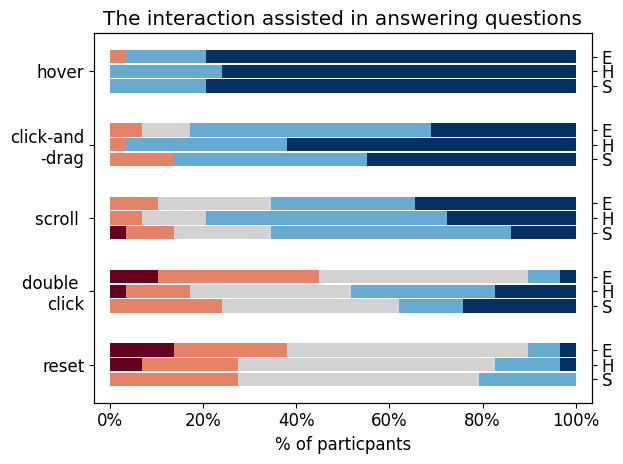

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 12})


# Example data (substitute with your real data)
dummy = pd.DataFrame(fdata, index=list(range(len(fdata["SD"]))))

# Colors for the bars
colors = [cmap(0), cmap(0.25), 'lightgrey', cmap(0.75), cmap(1.0)]

# Initialize the figure
fig, ax = plt.subplots()
fig.set_dpi(100)

# Set the width of bars and the gap between groups
bar_width = 0.9
group_gap = 2  # Larger space between groups

# Calculate the positions for the bars
positions = []
group_size = 3  # Every three bars grouped together
pos = 0

center = 10
offset = list()
for i in range(len(dummy)):
    if i % group_size == 0 and i != 0:
        pos += group_gap  # Add larger gap between groups
    positions.append(pos)
    pos += 1

    val = dummy.iloc[i,0] + dummy.iloc[i,1] + dummy.iloc[i, 2] / 2
    offset.append(0 )

offset = np.array(offset)
labels = ["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"]
# Plot the bars for each column (stacked bar chart)
for i, col in enumerate(dummy.columns):
    ax.barh(positions, dummy[col], left=dummy.iloc[:, :i].sum(axis=1) + offset, color=colors[i], edgecolor='none', height=bar_width,label=labels[i])

# Customize the x-ticks
# ax.set_xticks(np.arange(0.5, max(positions), 3))  # Adjust tick positions
# ax.set_xticklabels(dummy.index)

# z = plt.axvline((29 / 2), linestyle='--', color='black', alpha=.5)
# z.set_zorder(-1)

ax.set_xlim(-1,30)
rrange = np.linspace(0,29,6)
ax.set_xticks(rrange)
ax.set_xticklabels([f'{x}%' for x in range(0,101,20)])
ax.set_xlabel(f"% of particpants")

ax.set_yticks([p for p in positions[1::3]])
ax.set_yticklabels([questions[q] for q in qvis])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(positions)
ax2.set_yticklabels(["S", "H", "E"] * len(qvis))

# ax.legend(loc='upper left')
ax.set_title("The interaction assisted in answering questions")

# fig.subplots_adjust(left=0.35)
fig.tight_layout()
# Show the plot
plt.savefig("figures/interaction-likert.pdf",bbox_inches='tight')


In [19]:
figlegend = plt.figure(figsize=(2,1.5))
figlegend.legend(ax.get_legend_handles_labels()[0], ax.get_legend_handles_labels()[1])

<Figure size 200x150 with 0 Axes>

In [20]:
figlegend.tight_layout()
figlegend.savefig("legend.pdf")